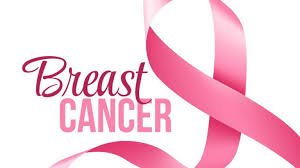

Breast cancer accounts for 12.5% of all new annual cancer cases worldwide, making it the most common cancer in the world. Breast cancer is the most commonly diagnosed cancer among U.S. women. Each year, about 30% of all newly diagnosed cancers in women are breast cancer. This study will help to come up with a model of breast cancer diagnosis that will hopeful be able to capture breast cancers at an early stage.


   
   

   
   <h2> Variable Definitions </h2>
   <ul>
        <li>Sample code number: 789012</li>
        <li>Clump Thickness: 8</li>
        <li>Uniformity of Cell Size: 7</li>
        <li>Uniformity of Cell Shape: 6</li>
        <li>Marginal Adhesion: 8</li>
        <li>Single Epithelial Cell Size: 7</li>
        <li>Bare Nuclei: 1</li>
        <li>Bland Chromatin: 5</li>
        <li>Normal Nucleoli: 4</li>
        <li>Mitoses: 1</li>
        <li>Predicted class: 4 For malignancy and 2 for beningn</li>
    </ul>
    <p> Data was obtained from Kaggle dataset </p>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file from Google Drive
df = pd.read_csv('/content/drive/My Drive/tumor.csv')
pd.set_option('display.max_rows', 100)
df.sample(5)

Mounted at /content/drive


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
132,1180831,3,1,1,1,3,1,2,1,1,2
65,1118039,5,3,4,1,8,10,4,9,1,4
80,1143978,5,2,1,1,2,1,3,1,1,2
434,1193544,5,7,9,8,6,10,8,10,1,4
105,1170420,1,6,8,10,8,10,5,7,1,4


In [4]:
df.shape

(683, 11)

Our data has 683 rows and 11 columns. Let's see any missing values

In [5]:
df.isna().sum()/len(df)*100

Sample code number             0.0
Clump Thickness                0.0
Uniformity of Cell Size        0.0
Uniformity of Cell Shape       0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Bare Nuclei                    0.0
Bland Chromatin                0.0
Normal Nucleoli                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

No missing values are present in the data set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,683.0,1.076720e+06,620644.047655,63375.0,877617.0,1171795.0,1238705.0,13454352.0
Clump Thickness,683.0,4.442167e+00,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805e+00,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227e+00,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161e+00,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261e+00,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095e+00,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693e+00,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221e+00,1.732674,1.0,1.0,1.0,1.0,10.0


In [8]:
df.drop(columns=['Sample code number'], axis=1, inplace=True)

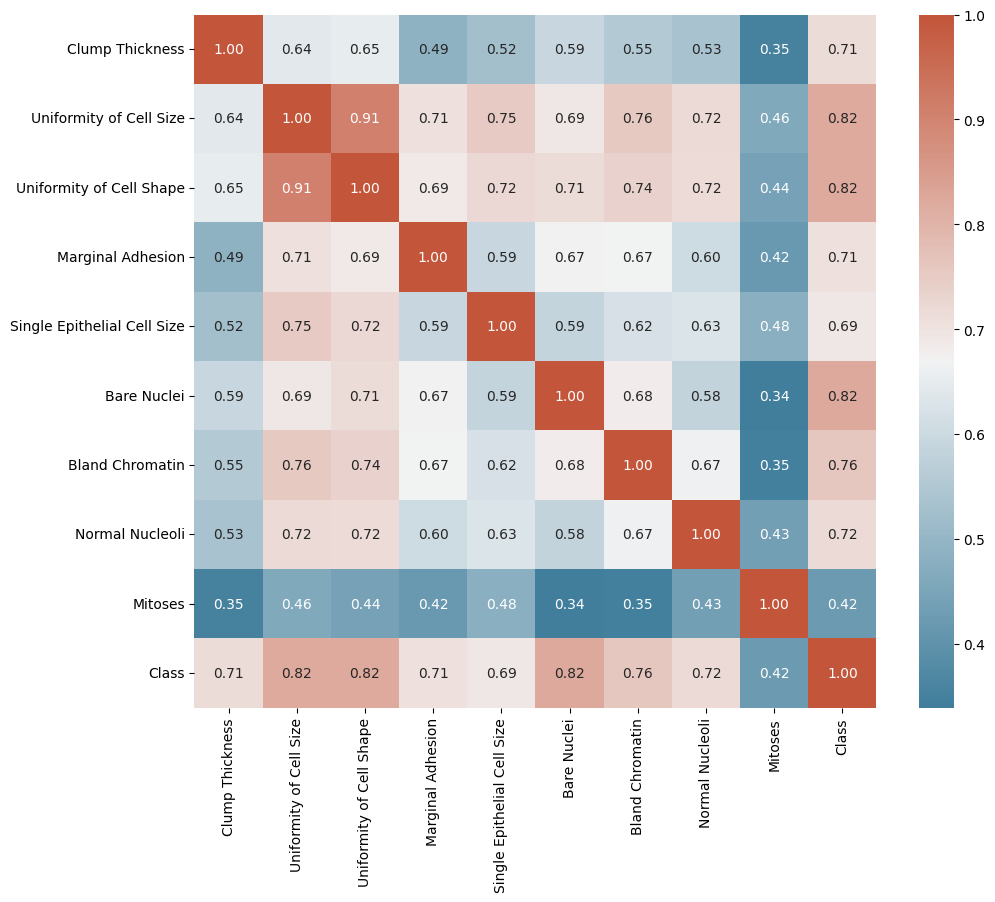

In [9]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio, include values
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10})

# Display the heatmap
plt.show()


Drop the columns with high correlation

In [10]:
df.drop(columns =['Uniformity of Cell Shape'], inplace=True, axis =1)

In [11]:
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

Benign Tumors are 444 in the dataset while malignant tumors are 239.

Split Data into Training and Testing

In [12]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error, mean_absolute_error, r2_score,confusion_matrix,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer



In [13]:
target_column ='Class'

In [14]:
X = df.drop(columns =['Class'], axis = 1)
y = df['Class']

### Feature Scaling

In [15]:
std = StandardScaler()
X_std = std.fit_transform(X)


In [16]:
X_train, X_test,y_train,y_test = train_test_split(X_std,y,test_size = 0.2, random_state=43)

Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)


In [18]:
mse = mean_squared_error(y_test, y_predicted)
rmse = mean_squared_error(y_test, y_predicted, squared=False)
mae = mean_absolute_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.22333375041266584
Root Mean Squared Error: 0.4725820039026728
Mean Absolute Error: 0.3239616823541813
R-squared: 0.7569717554791671


An R² of 0.757 means that approximately 75.7% of the variance in the target variable can be explained by the model's features. This indicates a good fit

## Logistic Regression

In [19]:
logre = LogisticRegression(random_state=42, max_iter=10000)
logre.fit(X_train,y_train)
y_predicted = logre.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_predicted))
print("Accuracy:\n",accuracy_score(y_test, y_predicted))
conf_matrix = confusion_matrix(y_test, y_predicted)

Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.98      0.97        88
           4       0.96      0.92      0.94        49

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

Accuracy:
 0.9562043795620438


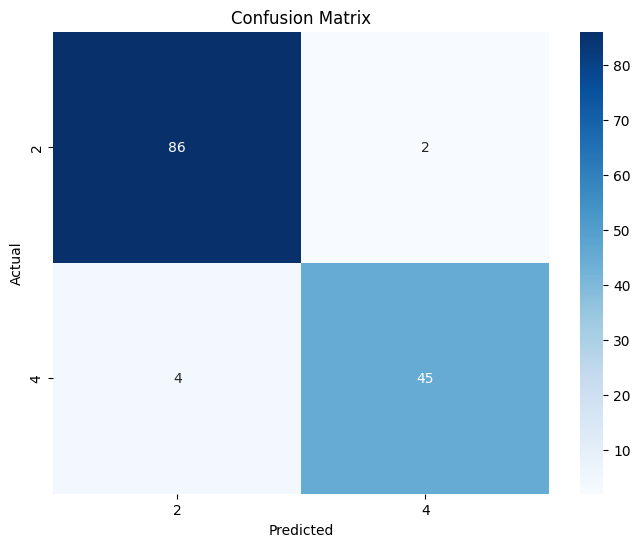

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[2, 4], yticklabels=[2, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The high accuracy of 96% indicates that the model is correctly predicting the classes for most of the instances.

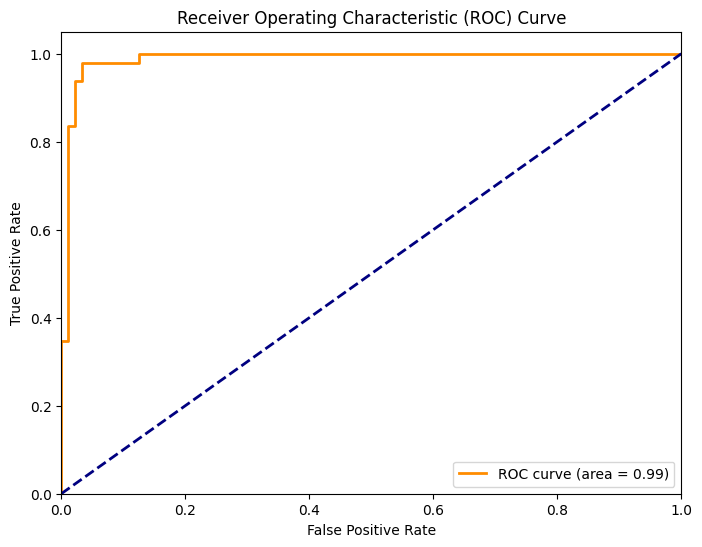

In [21]:
y_prob = logre.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=4)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

An AUC value of 0.99 is very high, suggesting that your model has an excellent ability to distinguish between the positive and negative classes.

<h3> Cross Validation </h3>

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import joblib

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(logre, X, y, cv=cv, scoring='accuracy')

# Print the results
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation scores: [0.97080292 0.96350365 0.97810219 0.96323529 0.96323529]
Mean accuracy: 0.9677758694718763
Standard deviation: 0.0059208350034166924


The scores [0.97080292, 0.96350365, 0.97810219, 0.96323529, 0.96323529] represent the accuracy of the model on each of the five folds. These scores are quite high, indicating that the model performs well on each subset of the data.
The average is also 96.7% which shows that our model is performing very well.

### Hyperparameter Tuning

In [24]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [5000, 10000, 20000]
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Fit to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'C': 1, 'max_iter': 5000, 'solver': 'saga'}
Best cross-validation score:  0.9677758694718763


In [25]:
# Define the final model with the best parameters
final_model = LogisticRegression(C=1, max_iter=5000, solver='saga', random_state=42)

# Train the final model on the entire dataset
final_model.fit(X, y)

test_accuracy = final_model.score(X_test, y_test)
print("Test set accuracy: ", test_accuracy)


Test set accuracy:  0.6423357664233577


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:

X_test = pd.DataFrame(X_test, columns=X.columns)


In [27]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=1, max_iter=5000, solver='saga', random_state=42))

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

# Train the model on the entire training set
pipeline.fit(X, y)

# Evaluate on the test set
test_accuracy = pipeline.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Cross-validation scores: [0.97810219 0.97080292 0.97810219 0.96323529 0.96323529]
Mean accuracy: 0.9706955775010734
Standard deviation: 0.0066488944885960775
Test set accuracy: 0.6423357664233577


Our model performs poorly on Test data as the accuracy is 64%.

<h3> Random Forest </h3>

In [28]:

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up the GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Fit to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest: ", grid_search_rf.best_score_)

# Evaluate on the test set with the best parameters
best_rf_model = grid_search_rf.best_estimator_
test_accuracy_rf = best_rf_model.score(X_test, y_test)
print("Test set accuracy with Random Forest: ", test_accuracy_rf)

# Save the model to a file
joblib.dump(best_rf_model, 'random_forest_model.pkl')

Best parameters found for Random Forest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Random Forest:  0.9816680567139283
Test set accuracy with Random Forest:  0.9416058394160584


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


['random_forest_model.pkl']

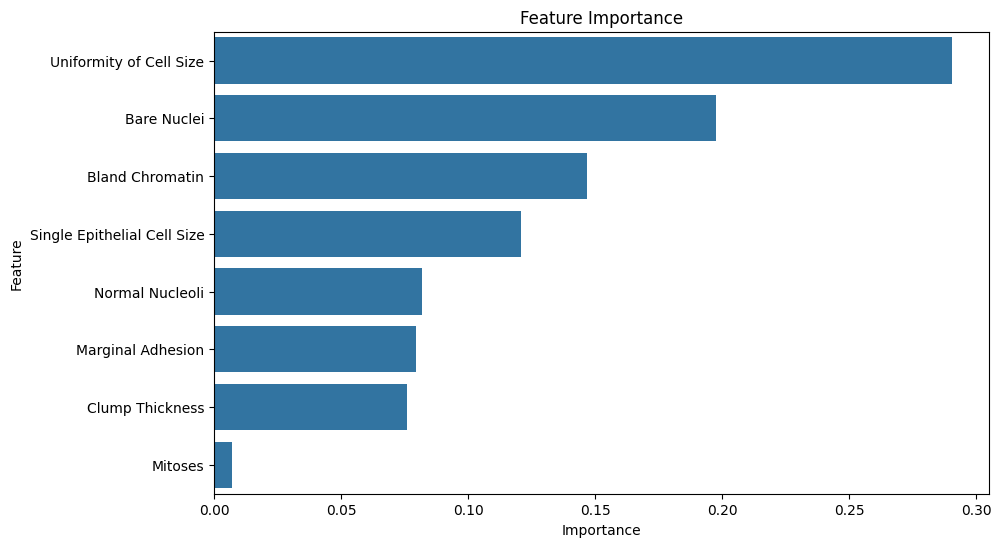

In [37]:
# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Extract feature importances
importances = best_rf.feature_importances_

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Better performance on test data is noted when using Random forest classification as accuracy increases to 94%. Uniformity of Cell Size has the highest importance score, indicating it is the most significant feature for the model.
Bare Nuclei and Bland Chromatin also have high importance scores, suggesting they are very influential in predicting the target variable.

Save the model

In [40]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(grid_search_rf, file)


In [41]:
# Load the model from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)

In [29]:
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance

In [30]:
# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
# Set up the GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Fit to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best cross-validation score for XGBoost: ", grid_search_xgb.best_score_)

# Evaluate on the test set with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_
test_accuracy_xgb = best_xgb_model.score(X_test, y_test)
print("Test set accuracy with XGBoost: ", test_accuracy_xgb)


Best parameters found for XGBoost:  {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.6}
Best cross-validation score for XGBoost:  0.9762301918265223
Test set accuracy with XGBoost:  0.9708029197080292


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

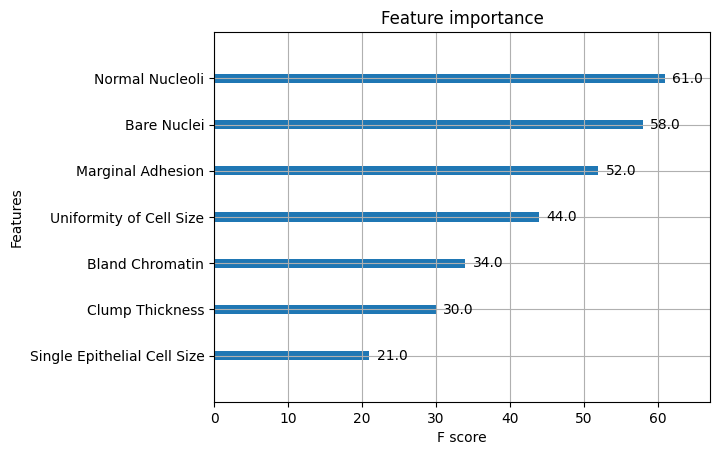

In [34]:
plot_importance(grid_search_xgb.best_estimator_)


The accuracy was better with Xgboost hence that will be our final model.
**Normal Nucleoli** has the highest importance score, indicating it is the most significant feature for the model.
**Single Epithelial Cell Size** has the lowest importance score among the listed features, indicating it is the least significant in comparison to others.